In [1]:
# colab 사용할 경우
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

Ronaldo.zip  sample_data  Son.zip  tire.zip


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler # learning-rate scheduler
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import time
import os
import copy

# Image Preprocessing
> 딥러닝에 필요한 이미지 조작 과정
* Son.zip & Ronaldo.zip 파일을 현재 경로상(코랩기준 '/content')에 업로드 해주세요.

## Pillow-Library(PIL)

이미지를 다루는 파이썬 라이브러리로 OpenCV도 존재하나 Pillow의 아래 장점들로 인해, 이번시간에는 Pillow를 사용해보자.
* RGB 순서 그대로 이미지 읽어옴
* torchvision에서의 지원이 잘 되어있음

In [5]:
from PIL import Image

In [6]:
# 본인의 구글 드라이브(현재 디렉터리)에 Son.zip 파일이 올라가 있어야 함!
# colab의 경우 content 폴더 바로 아래에 들어가면 됨

!ls # Son.zip 파일이 있는지 확인

Ronaldo.zip  sample_data  Son.zip  tire.zip


In [7]:
# 압축 풀기

!unzip -qq "Son.zip"
!ls # Son 폴더가 있는지 확인

Ronaldo.zip  sample_data  Son  Son.zip	tire.zip


In [8]:
# Son 폴더 안에 있는 데이터 확인

%cd /content/Son
!ls

/content/Son
Son1.jpg  Son2.jpg


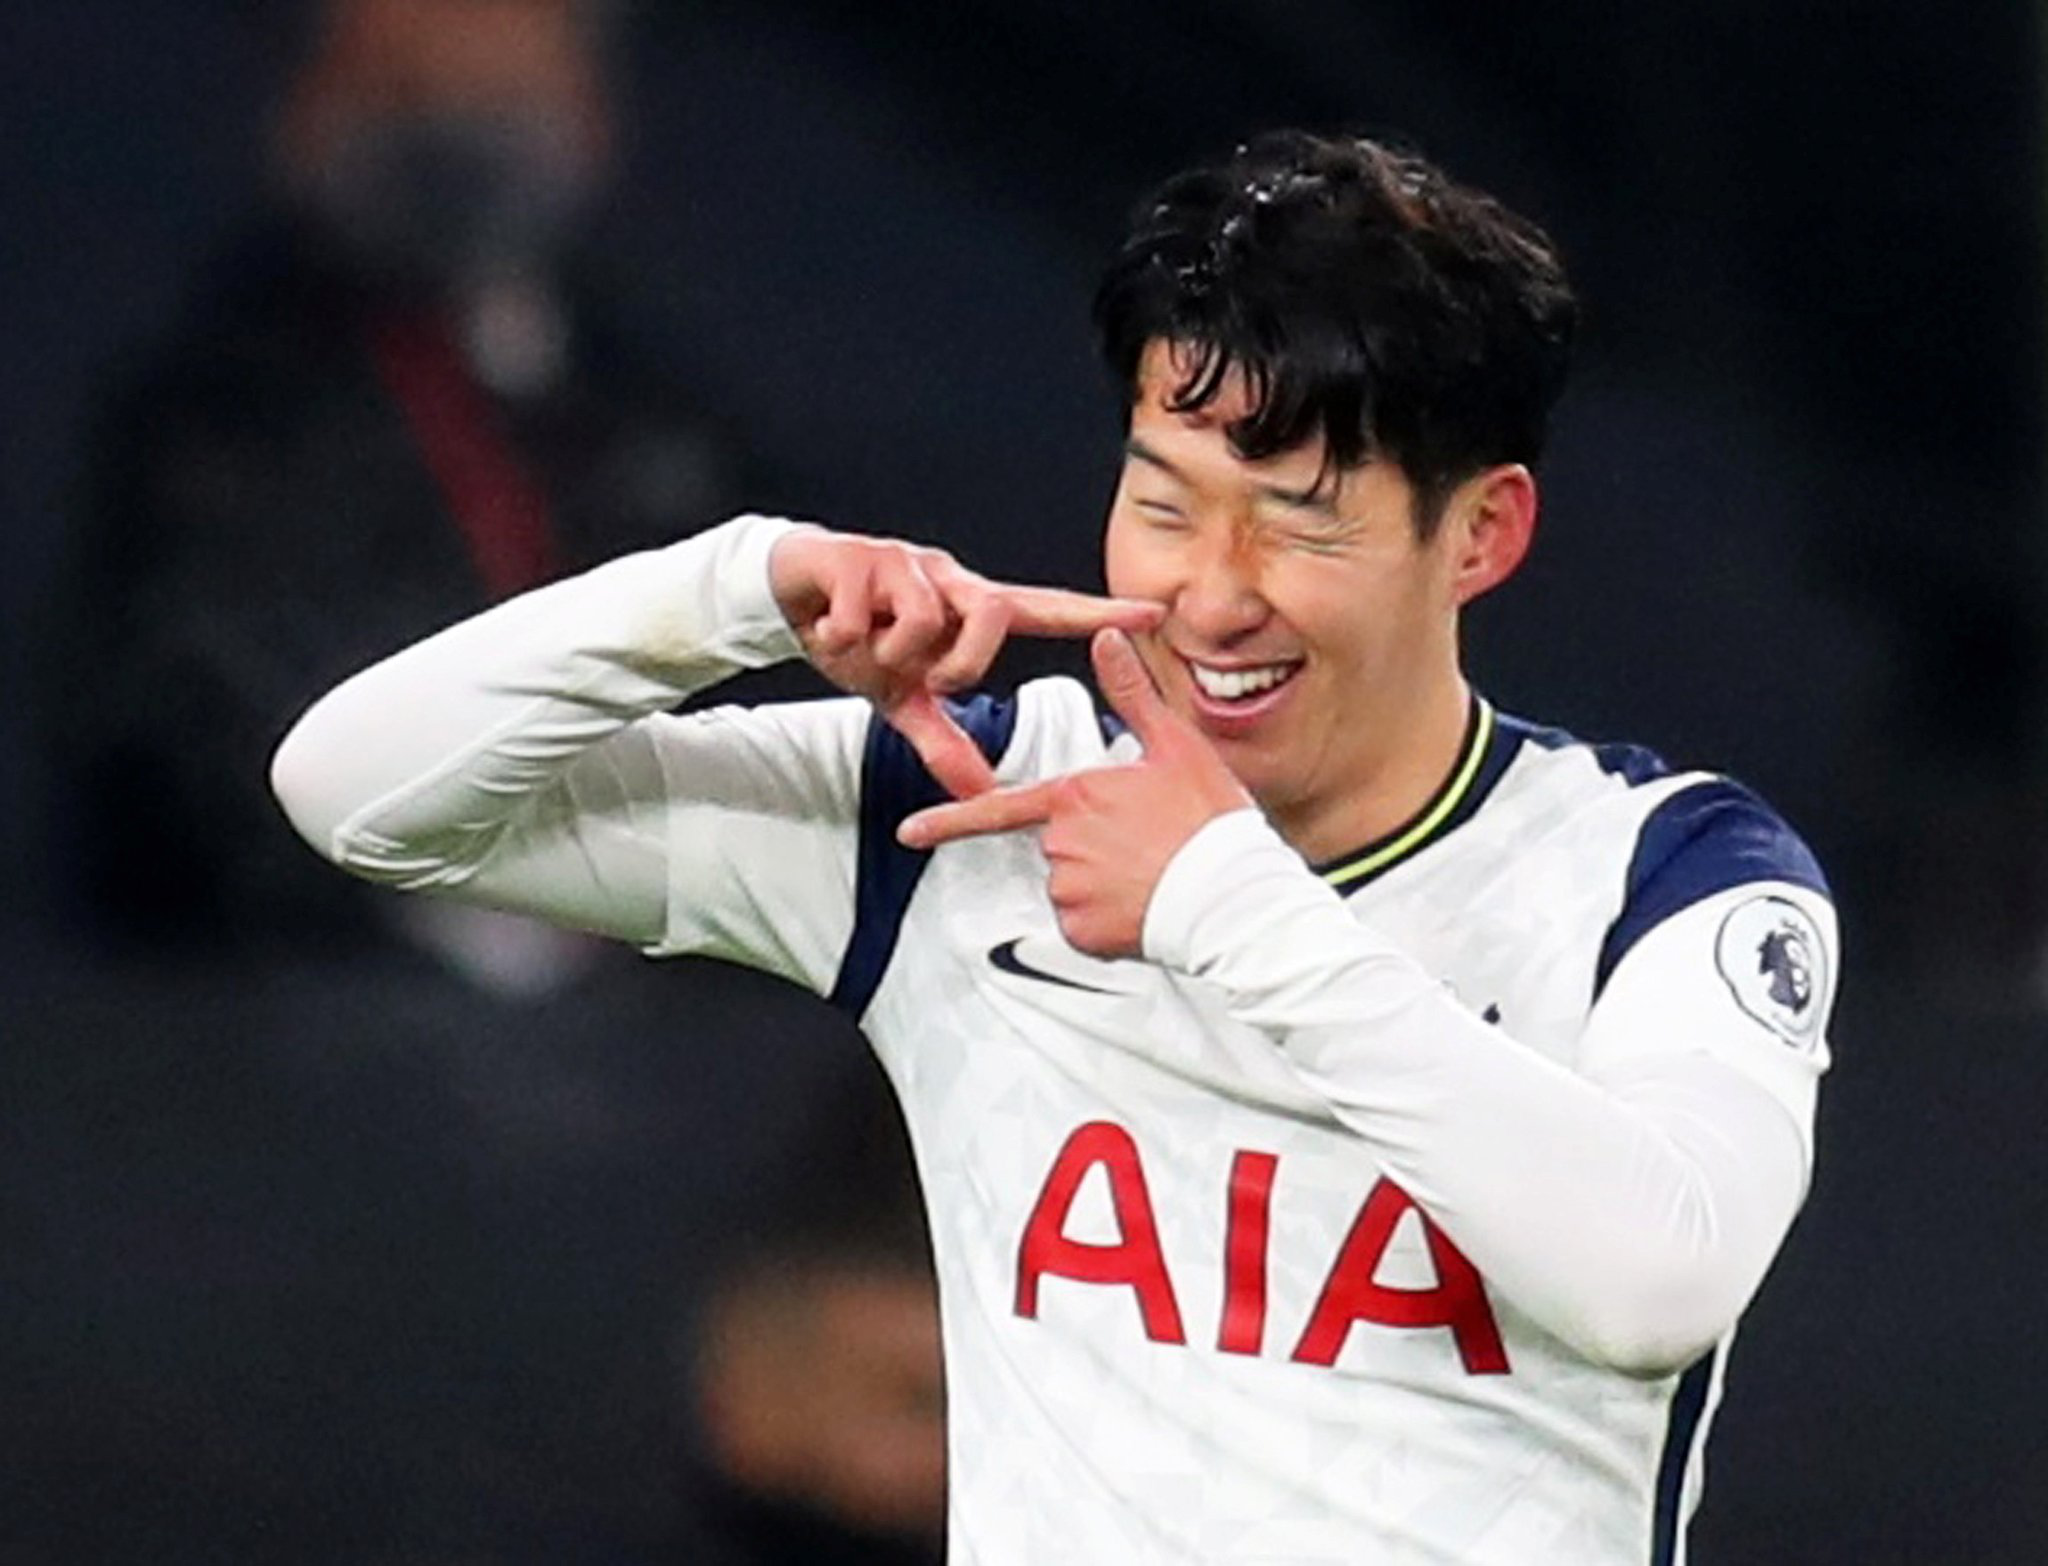

In [9]:
# pillow 라이브러리의 Image.open 함수로 해당 위치의 이미지를 읽어옴

path = 'Son1.jpg'
Son_img1 = Image.open(path)
Son_img1

In [10]:
type(Son_img1)

PIL.JpegImagePlugin.JpegImageFile

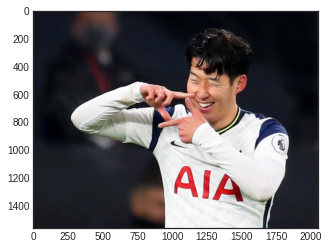

In [11]:
# 받아온 PIL 형태의 이미지를 numpy 형태로 변환

Son_img1_np = np.array(Son_img1)
plt.imshow(Son_img1_np) # numpy의 경우, matplotlib의 imshow()를 통해 이미지를 읽을 수 있다.

In [12]:
# shape 확인
# height = 1566, width = 2048, channel = 3 (RGB) 임을 확인할수 있음

Son_img1_np.shape # 즉, 순서가 (H,W,C)이다.

(1566, 2048, 3)

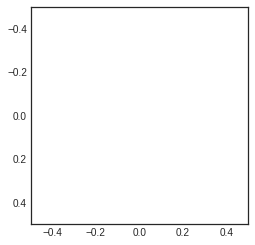

In [13]:
# RGB = [255,255,255] -> 흰색

img_np = [[[255,255,255]]]
plt.imshow(img_np)

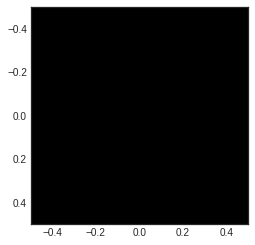

In [14]:
# RGB = [0,0,0] -> 검은색

img_np = [[[0,0,0]]]
plt.imshow(img_np)

In [15]:
# 가장 왼쪽 상단의 pixel (RGB) 값 확인
# data type = uint8 (only 0~255 사이 정수)

Son_img1_np[0,0,:] # 차례대로 R,G,B 3개의 값을 갖는다. -> RGB값이 작음으로 어두운 색임을 확인

array([15, 19, 30], dtype=uint8)

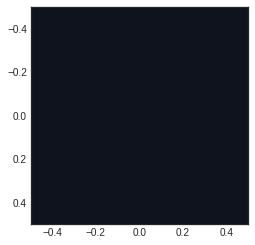

In [16]:
# 해당 픽셀이 나타내는 색상 확인

plt.imshow([[Son_img1_np[0,0,:]]])

In [17]:
# 가운데의 pixel (RGB) 값 확인
# data type = uint8 (only 0~255 사이 정수)

Son_img1_np[1566//2,2048//2,:] # 차례대로 R,G,B 3개의 값을 갖는다. -> RGB값이 큼으로 밝은 색임을 확인

array([226, 205, 202], dtype=uint8)

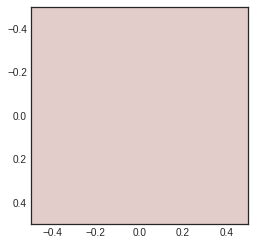

In [18]:
# 해당 픽셀이 나타내는 색상 확인

plt.imshow([[Son_img1_np[1566//2,2048//2,:]]])

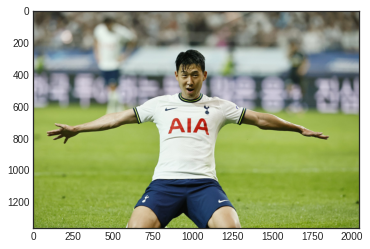

In [19]:
# Summary

# 1. jpg,jpeg,png(이미지파일) -> PIL 형태의 데이터
# pillow 라이브러리의 Image.open 함수

path = 'Son2.jpg'
Son_img2 = Image.open(path)


# 2. PIL 형태의 데이터 -> numpy형태의 데이터
# np.array() 함수

Son_img2_np = np.array(Son_img2)
plt.imshow(Son_img2_np)

## Tensor로 변환 
* ToTensor()

하는 역할

1. input데이터(PIL or numpy)를 tensor형태로 바꿔준다.

2. rgb값의 범위인 '0-255'를 '0-1'로 min-max scaling을 해준다.

이를 같이 해주는 것이 
`
torchvision.transforms.ToTensor()
`

In [20]:
import torchvision.transforms as transforms

In [21]:
# custom transform function 설정 - Compose 안에 내가 원하는 변환 과정을 순서대로 써주면됨
# 일단 ToTensor만 사용해보자.

my_transform = transforms.Compose([
    transforms.ToTensor()
])

1. input데이터(PIL or numpy)를 tensor형태로 바꿔준다.

In [22]:
# PIL 이미지 -> Tensor형태의 데이터

Son_img_ts = my_transform(Son_img1)

# PIL 이미지 -> numpy형태의 데이터 -> Tensor형태의 데이터

Son_img_np = np.array(Son_img1)
Son_img_ts_np = my_transform(Son_img_np)

In [23]:
Son_img_ts

tensor([[[0.0588, 0.0588, 0.0588,  ..., 0.0784, 0.0784, 0.0784],
         [0.0588, 0.0588, 0.0588,  ..., 0.0824, 0.0824, 0.0784],
         [0.0588, 0.0588, 0.0627,  ..., 0.0863, 0.0863, 0.0863],
         ...,
         [0.0902, 0.0941, 0.0941,  ..., 0.1216, 0.1216, 0.1216],
         [0.0902, 0.0902, 0.0902,  ..., 0.1216, 0.1216, 0.1216],
         [0.0980, 0.0980, 0.0980,  ..., 0.1216, 0.1216, 0.1216]],

        [[0.0745, 0.0745, 0.0745,  ..., 0.1020, 0.1020, 0.1020],
         [0.0745, 0.0745, 0.0745,  ..., 0.1059, 0.1059, 0.1020],
         [0.0745, 0.0745, 0.0784,  ..., 0.1098, 0.1098, 0.1098],
         ...,
         [0.0941, 0.0980, 0.0980,  ..., 0.1255, 0.1255, 0.1255],
         [0.0941, 0.0941, 0.0941,  ..., 0.1255, 0.1255, 0.1255],
         [0.1020, 0.1020, 0.1020,  ..., 0.1255, 0.1255, 0.1255]],

        [[0.1176, 0.1176, 0.1176,  ..., 0.0863, 0.0863, 0.0863],
         [0.1176, 0.1176, 0.1176,  ..., 0.0902, 0.0902, 0.0863],
         [0.1176, 0.1176, 0.1216,  ..., 0.0941, 0.0941, 0.

In [24]:
Son_img_ts_np

tensor([[[0.0588, 0.0588, 0.0588,  ..., 0.0784, 0.0784, 0.0784],
         [0.0588, 0.0588, 0.0588,  ..., 0.0824, 0.0824, 0.0784],
         [0.0588, 0.0588, 0.0627,  ..., 0.0863, 0.0863, 0.0863],
         ...,
         [0.0902, 0.0941, 0.0941,  ..., 0.1216, 0.1216, 0.1216],
         [0.0902, 0.0902, 0.0902,  ..., 0.1216, 0.1216, 0.1216],
         [0.0980, 0.0980, 0.0980,  ..., 0.1216, 0.1216, 0.1216]],

        [[0.0745, 0.0745, 0.0745,  ..., 0.1020, 0.1020, 0.1020],
         [0.0745, 0.0745, 0.0745,  ..., 0.1059, 0.1059, 0.1020],
         [0.0745, 0.0745, 0.0784,  ..., 0.1098, 0.1098, 0.1098],
         ...,
         [0.0941, 0.0980, 0.0980,  ..., 0.1255, 0.1255, 0.1255],
         [0.0941, 0.0941, 0.0941,  ..., 0.1255, 0.1255, 0.1255],
         [0.1020, 0.1020, 0.1020,  ..., 0.1255, 0.1255, 0.1255]],

        [[0.1176, 0.1176, 0.1176,  ..., 0.0863, 0.0863, 0.0863],
         [0.1176, 0.1176, 0.1176,  ..., 0.0902, 0.0902, 0.0863],
         [0.1176, 0.1176, 0.1216,  ..., 0.0941, 0.0941, 0.

In [25]:
# PIL형태로 넣든지 혹은 numpy로 변경해서 넣든지,
# transforms.ToTensor()를 적용하면, 같은 output값이 나온다.

(Son_img_ts == Son_img_ts_np).numpy().all()

# 따라서 굳이 numpy로 바꿔줄 필요없이, PIL값을 input으로 넣으면 된다.

True

2. rgb값의 범위인 '0-255'를 '0-1'로 min-max scaling을 해준다.

* 참고) PIL 이미지는 (H, W, C) 형태이지만 이를 변환한 Tensor 이미지는 (C, H, W)임에 유의하자

In [26]:
# transforms.ToTensor() 적용 전의 input; PIL 이미지
# (H,W,C)

Son_img_np.shape

(1566, 2048, 3)

In [27]:
# transforms.ToTensor() 적용 후의 output
# (C,H,W)

Son_img_ts.shape

torch.Size([3, 1566, 2048])

In [28]:
# 가장 첫번째 pixel (RGB) 값 확인

# ToTensor() 적용 전
print(Son_img1_np[0,0,:], '\n')

# ToTensor() 적용 후
print(Son_img_ts[:,0,0], '\n')

# 직접 min-max를 진행한 결과
print(Son_img1_np[0,0,:]/np.max(Son_img1_np))

[15 19 30] 

tensor([0.0588, 0.0745, 0.1176]) 

[0.05882353 0.0745098  0.11764706]


## Normalize 정규화
* 정규화의 이유 : 이미지 정규화를 진행하는 대표적인 이유 중 하나는 오차역전파(backpropagation)시, 그라디언트(Gradient) 계산을 수행하게 되는데, 데이터가 유사한 범위를 가지도록 하기 위함입니다.
* Normalize(mean, std)

참고) https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/

### Calculate mean and std

Channel-wise! (각 채널별인 R,G,B에 대하여 mean, std 값을 구해야함)

In [29]:
Son_img_ts.shape # C,H,W

torch.Size([3, 1566, 2048])

In [30]:
Son_img_ts.mean([1]).shape

torch.Size([3, 2048])

In [31]:
Son_img_ts.mean([1,2]).shape

torch.Size([3])

In [32]:
mean, std = Son_img_ts.mean(axis=[1,2]), Son_img_ts.std(axis=[1,2])

In [33]:
mean

tensor([0.3290, 0.3068, 0.3174])

In [34]:
std

tensor([0.3624, 0.3410, 0.3278])

### Normalize(mean, std)

In [35]:
# custom transform function 설정 - ToTensor에 이어서 Normalize까지

my_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [36]:
Son_img_normalized = my_transform(Son_img1) # PIL를 input으로 넣는다.

In [37]:
Son_img_normalized[:,0,0] # R,G,B-channels별로 Normalized한 후의, 왼쪽상단의 이미지(H=0,W=0)가 갖는 R,G,B

tensor([-0.7455, -0.6813, -0.6095])

In [38]:
# 정규화 후의 R,G,B-channels별 평균과 표준편차

mean_norm, std_norm = Son_img_normalized.mean(axis=[1,2]), Son_img_normalized.std(axis=[1,2])

In [39]:
mean_norm # 거의 0

tensor([-6.5238e-08,  1.1095e-08, -7.3745e-08])

In [40]:
std_norm # 1

tensor([1.0000, 1.0000, 1.0000])

In [41]:
# 편의상 이미지 보여주기 위해 numpy 변환; 아직도 (C,H,W)형태

Son_normalized_np = np.array(Son_img_normalized)
Son_normalized_np.shape

(3, 1566, 2048)

In [42]:
# 편의상 이미지 보여주기 위해 차원 순서 바꾸자; (C,H,W) -> (H,W,C)

Son_augmented_tr = Son_normalized_np.transpose(1,2,0)
Son_augmented_tr.shape

(1566, 2048, 3)

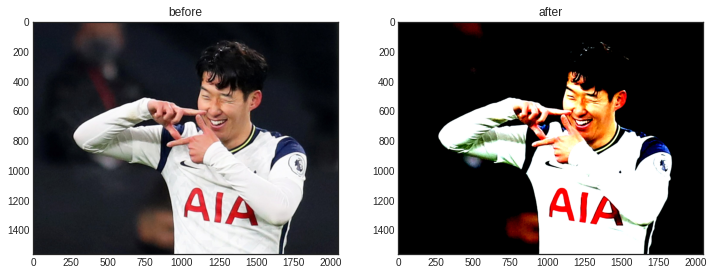

In [43]:
# 시각화

figure = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(Son_img1_np) # 정규화 전
plt.title('before')

plt.subplot(1,2,2)
plt.imshow(Son_augmented_tr) # 정규화 후
plt.title('after')

plt.show()

## Data Augmentation

* 굉장히 다양한 Augmentation 종류
* 너무 다양하게 쓸 필요는 없음 - 필요한 만큼만 적당히 쓰자
* 적용 후의 이미지를 보았을 때 이상하거나 성능이 좋지 않게 나온다면, 이 부분을 재수정한다.

참고) https://pytorch.org/vision/stable/transforms.html
<br>
참고) https://jungnamgyu.tistory.com/32

In [44]:
# 보통 적용할 augmentation을 ToTensor, Normalize 전에 사용
my_transform = transforms.Compose([
    transforms.Resize(300),                 # 300으로 resize
    transforms.RandomCrop(224),             # 랜덤으로 224만큼 crop
    transforms.RandomHorizontalFlip(p=0.5), # 0.5 확률로 horizontal flip
    transforms.RandomRotation(20),          # 랜덤으로 20도 만큼 rotate

    # 차례대로 수행함으로, tensor변경 및 정규화는 나중에 해준다.
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [45]:
Son_augmented = my_transform(Son_img1) # PIL객체를 input으로 넣는다.

In [46]:
# 편의상 이미지 보여주기 위해 numpy 변환
# 편의상 이미지 보여주기 위해 차원 순서 바꾸자

Son_augmented_np = np.array(Son_augmented)
Son_augmented_tr = Son_augmented_np.transpose(1,2,0)


# size 바뀐 것 확인가능

print('기존 사이즈 :', Son_img1_np.shape)
print('변경된 사이즈 :', Son_augmented_tr.shape)

기존 사이즈 : (1566, 2048, 3)
변경된 사이즈 : (224, 224, 3)


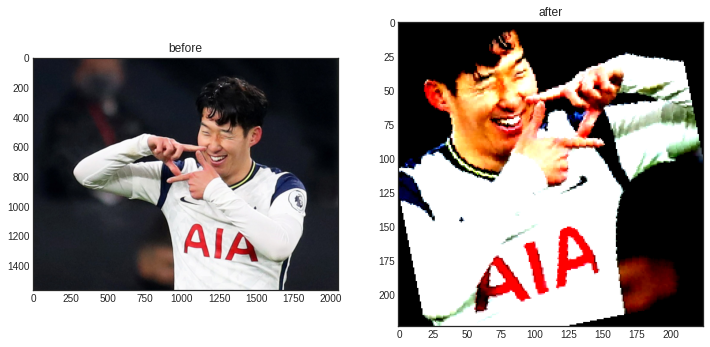

In [47]:
# 시각화

figure = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(Son_img1_np) # 전처리 전
plt.title('before')

plt.subplot(1,2,2)
plt.imshow(Son_augmented_tr) # 전처리 후
plt.title('after')

plt.show()

* 우리가 원하는 Augmentation 적용된 것 확인
* 충분히 위에서 normalized된 이미지와 비슷한 형태 - 고민할 것은 올바른 Augmentation 옵션의 활용 (모델이 이걸 Son로 분류하도록 할만큼 Son 같은 사진인가? 원래 특징 잃어버릴 정도로 너무 심하게 변환했을때? ex. 음식 뒤집으면)
* 너무 많이 적용시키면 underfitting 발생할수도
* 위 그림처럼 보통 모델에 들어가는 이미지의 차원 정사각형 형태로 맞춰줌
    * Ex. Resize(300) & RandomCrop(224)

## Normalize(Continued...)
* 사진이 여러개일 때는 mean과 std는 어떤 값으로 해야할까 ?
* 사진의 크기를 동일하게 맞춰야함으로, Data Augmentation이 사전적으로 진행되어야한다.

방법1. 모든 이미지에 대해서 channel인 R,G,B별로 mean과 std를 계산한다.

방법2. 대중적으로 많이 알려진 값을 사용한다.
* mean=[0.485, 0.456, 0.406]
* std=[0.229, 0.224, 0.225]
> ImageNet이 학습한 수백만장의 이미지의 RGB 각각의 채널에 대한 평균은 0.485, 0.456, 0.406 그리고 표준편차는 0.229, 0.224, 0.225 입니다. 만약, 일반적인 조도, 각도, 배경을 포함하는 평범한 이미지의 경우는 (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)으로 정규화하는 것을 추천한다는 커뮤니티 의견이 지배적
* 참고 : https://teddylee777.github.io/pytorch/torchvision-transform/#%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EC%9D%98-%ED%8F%89%EA%B7%A0mean%EA%B3%BC-%ED%91%9C%EC%A4%80%ED%8E%B8%EC%B0%A8std%EB%A5%BC-%EA%B3%84%EC%82%B0%ED%95%98%EC%97%AC-%EC%A0%81%EC%9A%A9%EC%8B%9C

사용할 데이터 : Son.zip & Ronaldo.zip

In [48]:
# 본인의 구글 드라이브(현재 디렉터리)에 Ronaldo.zip 파일이 올라가 있어야 함!
# colab의 경우 content 폴더 바로 아래에 들어가면 됨

%cd ..
!ls # Ronaldo.zip 파일이 있는지 확인

/content
Ronaldo.zip  sample_data  Son  Son.zip	tire.zip


In [49]:
# 압축 풀기

!unzip -qq "Ronaldo.zip"
!ls # Ronaldo 폴더가 있는지 확인

Ronaldo  Ronaldo.zip  sample_data  Son	Son.zip  tire.zip


### 방법1. 모든 이미지에 대해서 channel인 R,G,B별로 mean과 std를 계산한다.

In [50]:
# 서로 다른 이미지 사이즈를 동일하게 맞춰준다.
# normalize는 진행하지 않는다.

my_transform = transforms.Compose([
    transforms.Resize(300),                 # 300으로 resize
    transforms.RandomCrop(224),             # 랜덤으로 224만큼 crop -> (W,H)=(224,224)
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),

    transforms.ToTensor()
])

In [51]:
!pwd

/content


In [52]:
import glob # glob.glob을 통해 특정한 형태의 경로를 가진 파일을 탐색하여, 그 경로(문자열)를 리스트에 저장해서 반환

Son = sorted(glob.glob('./Son/*.jpg')) # * = 어떤 문자열
Ronaldo = sorted(glob.glob('./Ronaldo/*.jpeg'))

In [53]:
Son

['./Son/Son1.jpg', './Son/Son2.jpg']

In [54]:
Ronaldo

['./Ronaldo/Ronaldo1.jpeg', './Ronaldo/Ronaldo2.jpeg']

In [55]:
Son + Ronaldo

['./Son/Son1.jpg',
 './Son/Son2.jpg',
 './Ronaldo/Ronaldo1.jpeg',
 './Ronaldo/Ronaldo2.jpeg']

In [56]:
data = []
for path in Son+Ronaldo:
    img = Image.open(path)
    img_ts = my_transform(img)
    data.append(img_ts)

data

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       

In [57]:
def calculate_norm(data):
    # dataset의 axis=1, 2에 대한 평균 산출
    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x in data])
    # r, g, b 채널에 대한 각각의 평균 산출
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    # dataset의 axis=1, 2에 대한 표준편차 산출
    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x in data])
    # r, g, b 채널에 대한 각각의 표준편차 산출
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()
    
    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

In [58]:
mean_, std_ = calculate_norm(data)

print(mean_, std_)

(0.43944395, 0.43666878, 0.37737063) (0.2957071, 0.29054427, 0.29193836)


In [59]:
# normalize 부분 추가

my_transform = transforms.Compose([
    transforms.Resize(300),                 
    transforms.RandomCrop(224),             
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),          

    transforms.ToTensor(),
    transforms.Normalize(mean_, std_) # 데이터로부터 직접 구한 값
])

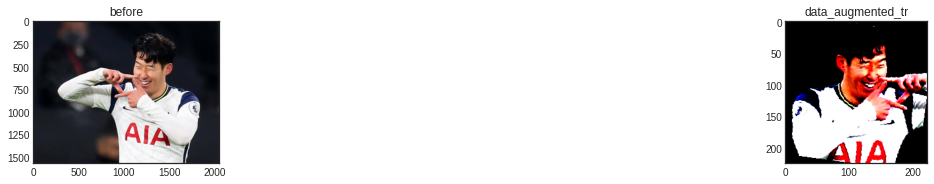

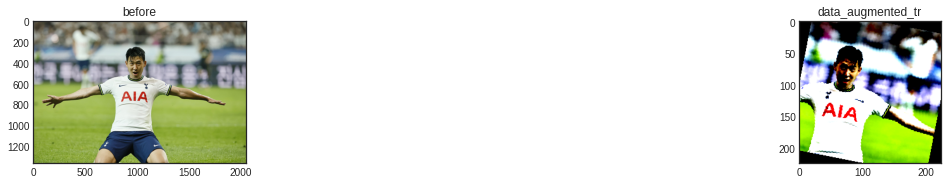

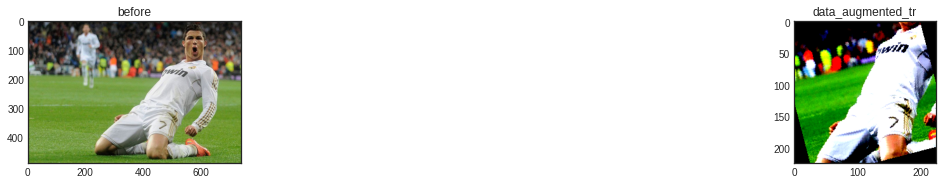

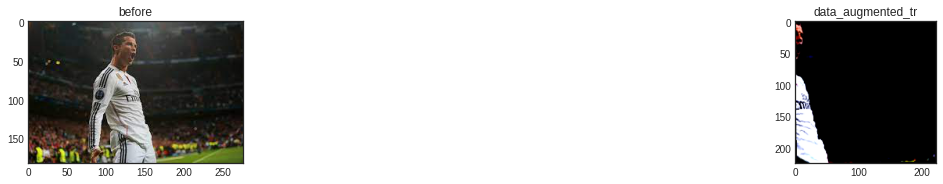

In [60]:
for i in range(len(Son+Ronaldo)):

    path = (Son+Ronaldo)[i]

    # 변경전 데이터
    data_origin = Image.open(path)
    data_origin_np = np.array(data_origin)

    # 전처리 후의 데이터
    data_augmented = my_transform(data_origin) # PIL객체를 input으로 넣는다.
    data_augmented_np = np.array(data_augmented)
    data_augmented_tr = data_augmented_np.transpose(1,2,0)

    # 시각화
    figure = plt.figure(figsize=(24,12))

    plt.subplot(len(Son+Ronaldo),2,2*i+1)
    plt.imshow(data_origin_np) # 전처리 전
    plt.title('before')

    plt.subplot(len(Son+Ronaldo),2,2*i+2)
    plt.imshow(data_augmented_tr) # 전처리 후
    plt.title('data_augmented_tr')

plt.show()

#### 참고 : 만약 torch에 저장된 데이터를 사용할 때의 평균과 표준편차를 구하려면
* 주석 풀고 실행

In [61]:
# from torch.utils.data import Dataset, DataLoader
# import torchvision

# train = torchvision.datasets.CIFAR10(root='/content', 
#                          train=True, 
#                          download=True, 
#                          transform=my_transform                
#                         )

In [62]:
# def calculate_norm(dataset):
#     # dataset의 axis=1, 2에 대한 평균 산출
#     mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset]) # 여기를 바꾸면 된다.
#     # r, g, b 채널에 대한 각각의 평균 산출
#     mean_r = mean_[:, 0].mean()
#     mean_g = mean_[:, 1].mean()
#     mean_b = mean_[:, 2].mean()

#     # dataset의 axis=1, 2에 대한 표준편차 산출
#     std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
#     # r, g, b 채널에 대한 각각의 표준편차 산출
#     std_r = std_[:, 0].mean()
#     std_g = std_[:, 1].mean()
#     std_b = std_[:, 2].mean()
    
#     return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

In [63]:
# # 조금 걸린다.

# mean_cifar10, std_cifar10 = calculate_norm(train)

# print(mean_cifar10, std_cifar10)

### 방법2. 대중적으로 많이 알려진 값을 사용한다.
* mean=[0.485, 0.456, 0.406]
* std=[0.229, 0.224, 0.225]

In [64]:
my_transform = transforms.Compose([
    transforms.Resize(300),                 
    transforms.RandomCrop(224),             
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),          

    transforms.ToTensor(),
    transforms.Normalize(mean_, std_) # 데이터로부터 직접 구한 값
])

In [65]:
my_transform_fr = transforms.Compose([
    transforms.Resize(300),                 
    transforms.RandomCrop(224),             
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),          

    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 대중적으로 많이 사용하는 값
])

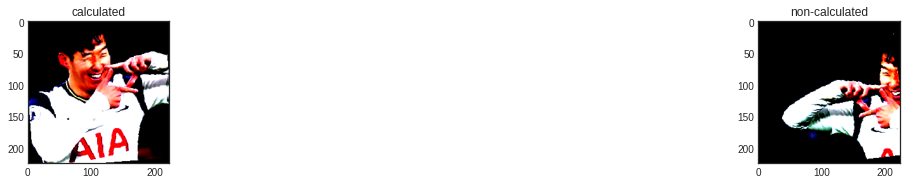

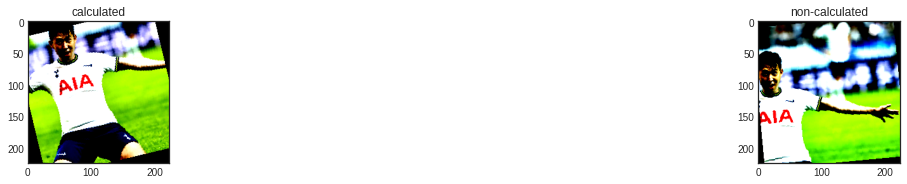

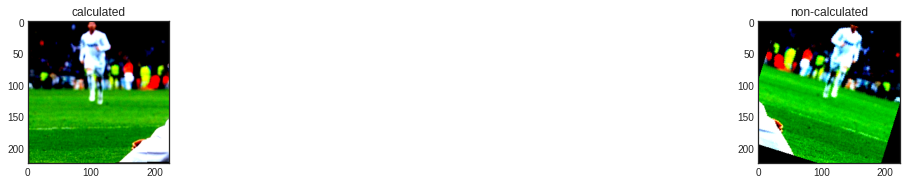

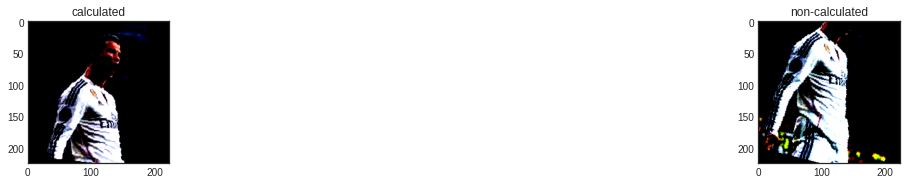

In [66]:
for i in range(len(Son+Ronaldo)):

    path = (Son+Ronaldo)[i]

    # 변경전 데이터
    data_origin = Image.open(path)
    data_origin_np = np.array(data_origin)

    # 직접구한 평균과 분산으로 전처리 후의 데이터
    data_augmented = my_transform(data_origin)
    data_augmented_np = np.array(data_augmented)
    data_augmented_tr = data_augmented_np.transpose(1,2,0)

    # 대중적인 평균과 분산으로 전처리 후의 데이터
    data_augmented_fr = my_transform_fr(data_origin)
    data_augmented_np_fr = np.array(data_augmented_fr)
    data_augmented_tr_fr = data_augmented_np_fr.transpose(1,2,0)
    
    # 시각화

    figure = plt.figure(figsize=(24,12))

    plt.subplot(len(Son+Ronaldo),2,2*i+1)
    plt.imshow(data_augmented_tr) # 직접구함
    plt.title('calculated')

    plt.subplot(len(Son+Ronaldo),2,2*i+2)
    plt.imshow(data_augmented_tr_fr) # 널리알려진값
    plt.title('non-calculated')

plt.show()

# 눈으로 봤을 때는 큰 차이가 없어보인다.

# Pytorch에서 제공하지 않는 Dataset을 사용하기 위한 방법 (1)
## ***ImageFolder( )***

> 앞선 Image Preprocessing을 이용해서, 직접 얻은 데이터셋에 대해서 학습을 진행하기 위해 사전작업을 한다.
* 우리가 주로 다루게 될 앞으로의 상황은 가지고 있는 이미지를 직접 사용하는 것
* 기존에 사용했던, MNIST, CIFAR10 등의 이미 널리 알려진 데이터가 아닌 다른 데이터를 사용할 때, 알아야 되는 개념
* tire.zip 파일을 현재 경로상(코랩기준 '/content')에 업로드 해주세요.

### 데이터 구조 확인

In [68]:
!ls

Ronaldo  Ronaldo.zip  sample_data  Son	Son.zip  tire.zip


In [69]:
!pwd

/content


In [70]:
# python에서 파일 관리해주는 라이브러리

import os
import glob
import shutil

In [71]:
# 압축 풀기
# Tip) colab 기준, 내 컴퓨터에서 압축을 풀어 폴더를 업로드하는 것보다,
# 아래와 같은 명령어로 colab 내에서 압축을 풀어 진행하는 것이 데이터 접근 속도에 있어서 훨씬 빠름

!unzip -qq "tire.zip"
!ls # tire-dataset 폴더가 생겼는지 확인

Ronaldo  Ronaldo.zip  sample_data  Son	Son.zip  tire-dataset  tire.zip


In [76]:
# tire-dataset 폴더 안으로 들어가보자.

%cd tire-dataset
!ls # 3개의 폴더가 존재; 폴더이름이 y_label값이다.

/content/tire-dataset
flat.class  full.class	no-tire.class


In [77]:
!pwd

/content/tire-dataset


In [91]:
# glob.glob로 파일 개수 확인
flat = sorted(glob.glob('/content/tire-dataset/flat.class/*.jpg')) # * = 어떤 문자열
full = sorted(glob.glob('/content/tire-dataset/full.class/*.jpg'))
no_tire = sorted(glob.glob('/content/tire-dataset/no-tire.class/*.jpg'))


# 300개씩 값이 들어있다.
print(len(flat))
print(len(full))
print(len(no_tire))

300
300
300


In [92]:
flat[:5] # 각 path가 문자열로 저장된 리스트

['/content/tire-dataset/flat.class/00000.jpg',
 '/content/tire-dataset/flat.class/00001.jpg',
 '/content/tire-dataset/flat.class/00002.jpg',
 '/content/tire-dataset/flat.class/00003.jpg',
 '/content/tire-dataset/flat.class/00004.jpg']

편의를 위해 폴더 구조를

> * train/flat/xxx.jpg
> * train/full/xxx.jpg
> * train/no_tire/xxx.jpg

> * test/flat/xxx.jpg
> * test/full/xxx.jpg
> * test/no_tire/xxx.jpg

로 두어 이미지를 배치하는 것이 좋다.
따라서 현재 이미지를 train / test 폴더로 적절히 split해보자
* 나중에 ImageFolder를 사용해 Dataset을 만들려면, 이런 구조를 갖춰야하기 때문이다.

### 데이터 train/test split
* 20%의 데이터를 test로 활용하자

In [80]:
# test에 넣을 이미지 개수 계산

flat_test_count = round(len(flat)*0.2)
full_test_count = round(len(full)*0.2)
no_tire_test_count = round(len(no_tire)*0.2)

print(flat_test_count)
print(full_test_count)
print(no_tire_test_count)

60
60
60


In [81]:
import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  

  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count): # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files] # 리스트내포

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [95]:
# 폴더 경로 선언 & 만들기

flat_train_path='/content/train/flat'
flat_test_path='/content/test/flat'
os.makedirs(flat_train_path, exist_ok=True)
os.makedirs(flat_test_path, exist_ok=True)

full_train_path='/content/train/full'
full_test_path='/content/test/full'
os.makedirs(full_train_path, exist_ok=True)
os.makedirs(full_test_path, exist_ok=True)

no_tire_train_path='/content/train/no_tire'
no_tire_test_path='/content/test/no_tire'
os.makedirs(no_tire_train_path, exist_ok=True)
os.makedirs(no_tire_test_path, exist_ok=True)

In [98]:
%cd ..
!ls

Ronaldo      sample_data  Son.zip  tire-dataset  train
Ronaldo.zip  Son	  test	   tire.zip


In [99]:
split(flat, flat_test_count, flat_train_path, flat_test_path)
split(full, full_test_count, full_train_path, full_test_path)
split(no_tire, no_tire_test_count, no_tire_train_path, no_tire_test_path)

train 폴더 이미지 개수 : 240
test 폴더 이미지 개수 : 60
train 폴더 이미지 개수 : 240
test 폴더 이미지 개수 : 60
train 폴더 이미지 개수 : 240
test 폴더 이미지 개수 : 60


결과적으로

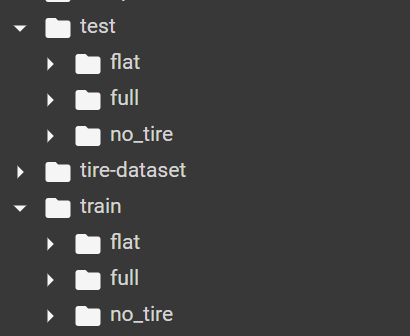

### 이미지 순서대로 넘버링
* 각 폴더 안에서 편의를 위해 0번부터 넘버링되도록 파일 이름을 바꾸자
* 추후에 나올 `ImageFolder`를 활용한다면 굳이 거쳐야 하는 과정은 아님

In [100]:
# random한 번호로 값이 들어가있다.

flat_test = sorted(glob.glob('/content/test/flat/*.jpg'))
flat_test[:5]

['/content/test/flat/00010.jpg',
 '/content/test/flat/00013.jpg',
 '/content/test/flat/00015.jpg',
 '/content/test/flat/00018.jpg',
 '/content/test/flat/00026.jpg']

In [101]:
i = 4
print(f'{i:0>5}') # 이 형식으로 바꿀예정

i = 200
print(f'{i:0>5}') # 이 형식으로 바꿀예정

00004
00200


In [103]:
def rename(img_dir):
  # img_dir : rename을 할 대상 폴더

  file_list = sorted(glob.glob(img_dir+'/*.jpg')) # 들어있는 파일이름 리스트
  
  for i in range(len(file_list)):
    os.rename(file_list[i], os.path.join(img_dir, f'{i:0>5}.jpg')) # 순서대로 0000i.jpg로 이름 변경

In [104]:
rename('/content/test/flat')
rename('/content/test/full')
rename('/content/test/no_tire')

In [105]:
rename('/content/train/flat')
rename('/content/train/full')
rename('/content/train/no_tire')

In [106]:
# 잘 rename 되었는지 확인

flat_train = sorted(glob.glob('/content/train/flat/*.jpg'))
flat_test = sorted(glob.glob('/content/test/flat/*.jpg'))

print(flat_train[:5])
print(flat_test[-5:])

['/content/train/flat/00000.jpg', '/content/train/flat/00001.jpg', '/content/train/flat/00002.jpg', '/content/train/flat/00003.jpg', '/content/train/flat/00004.jpg']
['/content/test/flat/00055.jpg', '/content/test/flat/00056.jpg', '/content/test/flat/00057.jpg', '/content/test/flat/00058.jpg', '/content/test/flat/00059.jpg']


### ImageFolder로 datasets 제작하기 및 datasets 확인하기

#### ImageFolder
* 위와 같이 폴더 배치를 했다면 `torchvision.datasets.ImageFolder`를 활용하여 바로 Dataset 선언할 수 있음

이미 전처리 되어 저장된 데이터를 사용하는 이전까지의 방법
* datasets.MNIST( )

In [ ]:
# trainset = datasets.MNIST(root='/content', # 이곳에 MNIST폴더안에 데이터가 저장된다.
#                           train=True, download=True,
#                           transform=mnist_transform) # 어떤 transform을 할 것인가

# testset = datasets.MNIST(root='/content',
#                          train=False, download=True,
#                          transform=mnist_transform)

오늘 시도한 raw 데이터를 가지고 Dataset만드는 방법
* datasets.ImageFolder( )

In [107]:
# 서로 다른 이미지 사이즈를 동일하게 맞춰준다.

my_transform = transforms.Compose([
    transforms.Resize(300),                 # 300으로 resize
    transforms.RandomCrop(224),             # 랜덤으로 224만큼 crop
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),
    
    transforms.ToTensor()
])

In [108]:
!ls # 해당 경로안에 test와 train 폴더가 있도록 이동해준다.

Ronaldo      sample_data  Son.zip  tire-dataset  train
Ronaldo.zip  Son	  test	   tire.zip


In [109]:
# datasets.ImageFolder()로 datasets 만들기

train_data = torchvision.datasets.ImageFolder(
    root = '/content/train', # 바로 train 폴더 지정
    transform = my_transform # 정규화를 하지 않은 transform
)
test_data = torchvision.datasets.ImageFolder(
    root = '/content/test',
    transform = my_transform
)

ImageFolder( )로 만든 Dataset 특성 확인

In [110]:
train_data

Dataset ImageFolder
    Number of datapoints: 720
    Root location: /content/train
    StandardTransform
Transform: Compose(
               Resize(size=300, interpolation=bilinear, max_size=None, antialias=None)
               RandomCrop(size=(224, 224), padding=None)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [111]:
# train dataset 총 개수 = 240*3 = 720; 각 폴더(flat/full/no-tire)당 240개씩 이미지 존재

len(train_data)

720

In [ ]:
train_data[0] # 1번쨰 데이터

In [113]:
# 1번쨰 데이터의 X값(이미지 정보)

train_data[0][0].shape # 모양만 확인

torch.Size([3, 224, 224])

In [114]:
# 1번쨰 데이터의 y값(label 클래쓰 정보)

train_data[0][1]

0

In [115]:
# 모든 데이터의 y값(label 클래쓰 정보)

y_list = []

for i in range(len(train_data)):
    y_list.append(train_data[i][1])

import pandas as pd
y_pd = pd.Series(np.array(y_list)).value_counts()
y_pd

# flat/full/no-tire -> 0/1/2 로 labeling되어 있다.

0    240
1    240
2    240
dtype: int64

### 데이터에 맞는 transforms 찾기

#### 1. 사이즈 조절

기존의 my_transform을 적용한 결과에 대한 시각화
* 각 클래쓰 별로 일부 데이터를 가져와서 확인해보자.

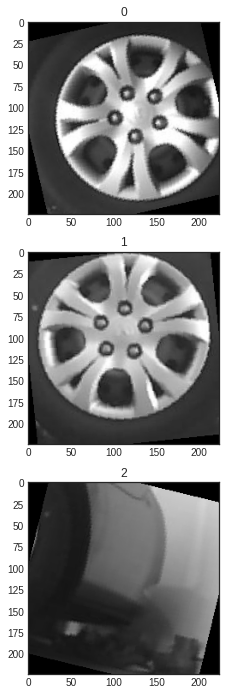

In [116]:
figure = plt.figure(figsize=(24,12))

for i in range(len(y_pd.index)): # flat/full/no-tire

    data_np = np.array(train_data[y_pd[:i].sum()][0])
    data_tr = data_np.transpose(1,2,0)

    plt.subplot(len(y_pd.index),1,i+1)
    plt.imshow(data_tr)
    plt.title('{}'.format(train_data[y_pd[:i].sum()][1]))

plt.show()

# 확인결과, 0(flat), 1(full)이 구분이 어렵다.
# 그 이유는 타이어의 아랫부분을 crop해버렸기 때문이다.
# 따라서 crop을 없애고, resize로만 진행시켜보자.

In [117]:
# Crop을 제거하고, Resize로만 원하는 사이즈(H,W)를 맞춘다.

my_transform = transforms.Compose([
    transforms.Resize(224),                 # 224로 resize
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),
    
    transforms.ToTensor()
])

In [118]:
# datasets.ImageFolder()로 datasets 만들기

train_data = torchvision.datasets.ImageFolder(
    root = '/content/train', # 바로 train 폴더 지정
    transform = my_transform # 정규화를 하지 않은 transform
)
test_data = torchvision.datasets.ImageFolder(
    root = '/content/test',
    transform = my_transform
)

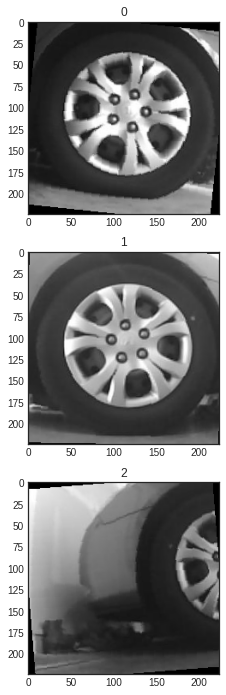

In [119]:
# 시각화

figure = plt.figure(figsize=(24,12))

for i in range(len(y_pd.index)): # flat/full/no-tire

    data_np = np.array(train_data[y_pd[:i].sum()][0])
    data_tr = data_np.transpose(1,2,0)

    plt.subplot(len(y_pd.index),1,i+1)
    plt.imshow(data_tr)
    plt.title('{}'.format(train_data[y_pd[:i].sum()][1]))

plt.show()

# 이제는 직접 보았을 떄, flat/full/no-tire의 구분이 된다.

#### 2. 정규화를 위한 평균,표준편차 구하기
* 사진의 이미지 크기(HxW)를 동일하게 변경시켜준 뒤에, 평균과 표준편차를 구한다.

In [120]:
def calculate_norm(dataset):
    # dataset의 axis=1, 2에 대한 평균 산출
    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 평균 산출
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    # dataset의 axis=1, 2에 대한 표준편차 산출
    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 표준편차 산출
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()
    
    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

In [121]:
# train 데이터만을 기준으로 평균과 표준편차를 구해서 넣는다.

mean_, std_ = calculate_norm(train_data)

print(mean_, std_)

(0.366274, 0.366274, 0.366274) (0.23763567, 0.23763567, 0.23763567)


In [122]:
my_transform = transforms.Compose([
    transforms.Resize(224),                 # 224로 resize
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),
    
    transforms.ToTensor(),
    transforms.Normalize(mean_, std_)

])

In [123]:
# datasets.ImageFolder()로 datasets 만들기

train_data = torchvision.datasets.ImageFolder(
    root = '/content/train', # 바로 train 폴더 지정
    transform = my_transform # 정규화를 하지 않은 transform
)
test_data = torchvision.datasets.ImageFolder(
    root = '/content/test',
    transform = my_transform
)

In [124]:
# 정규화 적용 후

mean_, std_ = calculate_norm(train_data)
print('train :', mean_, std_)

mean_, std_ = calculate_norm(test_data)
print('test :', mean_, std_)

train : (-0.0014128818, -0.0014128818, -0.0014128818) (0.99925715, 0.99925715, 0.99925715)
test : (0.00313353, 0.00313353, 0.00313353) (0.99957395, 0.99957395, 0.99957395)


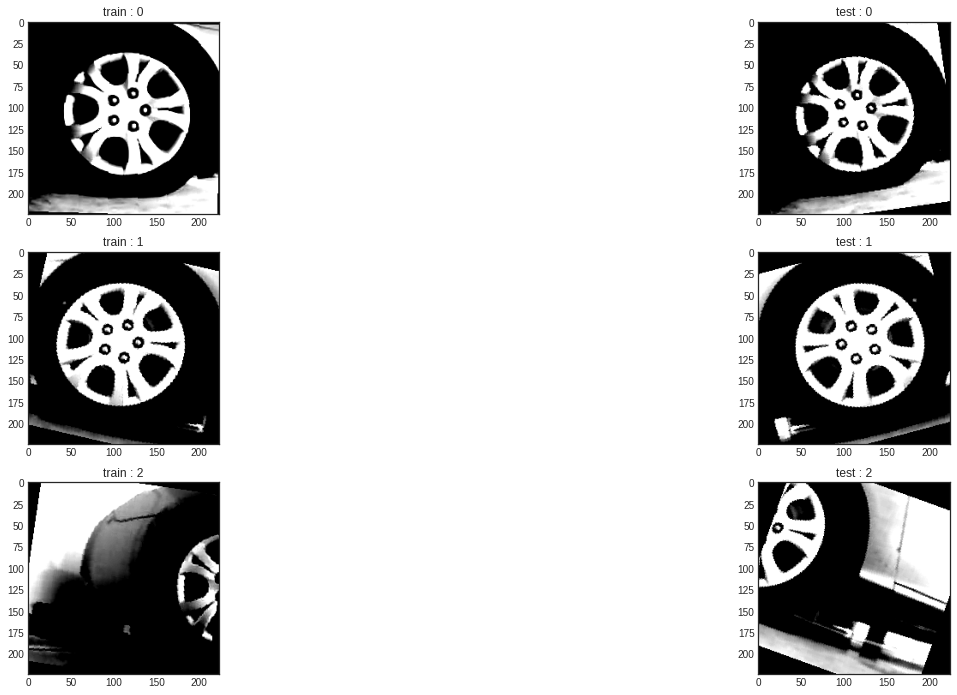

In [125]:
# train/test 데이터 시각화

figure = plt.figure(figsize=(24,12))

data_list = [train_data, test_data]
name_list = ['train', 'test']

for i in range(len(data_list)):

    # 각 train/test 별 y-value값으로 사이즈 확인
    y_list = []

    for k in range(len(data_list[i])):
        y_list.append(data_list[i][k][1])

    y_pd = pd.Series(np.array(y_list)).value_counts()

    for j in range(len(y_pd.index)): # flat/full/no-tire

        data_np = np.array(data_list[i][y_pd[:j].sum()][0])
        data_tr = data_np.transpose(1,2,0)

        plt.subplot(len(y_pd.index),2,i+2*j+1)
        plt.imshow(data_tr)
        plt.title('{} : {}'.format(name_list[i], data_list[i][y_pd[:j].sum()][1]))

plt.show()

# 시각적으로 구분이 가능해보인다.

### 그럼 이 다음에는 어떻게 계속 진행되는가..?
* DataLoader( )로 위에서 만든 Dataset을 올려주면 된다.
* 즉, DataLoader()로 이제 batch 만큼 나눠주면 된다는 의미
* 아래 그림에서 Dataset 과정이 끝났기에, 이제는 DataLoader 과정을 진행해야하는 상태

Recall

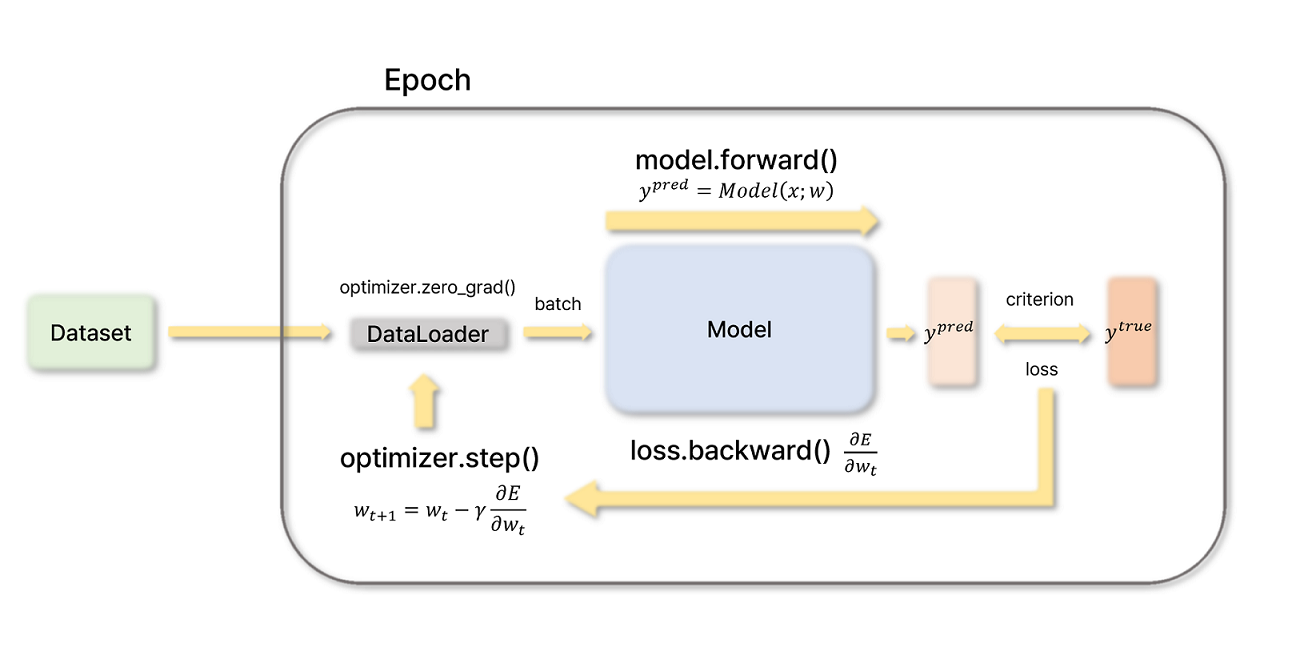

In [126]:
trainloader_myData_tire = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      
    shuffle=True,         
    num_workers=2
)

testloader_myData_tire = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      
    shuffle=False,        
    num_workers=2
)

이후, 아래 과정을 진행한다.
> 모델 객체 선언 및 모델변수 생성 -> 손실함수 및 옵티마이저 정의 -> 모델 학습 -> 모델 테스트

# Pytorch에서 제공하지 않는 Dataset을 사용하기 위한 방법 (2)
## ***Custom Dataset Class 만들기***

> * 직접 Datset 클래스 만들기 - 추후 더 복잡한 task에 유용
> * 우리가 원하는대로 함수 내용 정하면됨
    * 예를 들어, RAM이 부족한 환경에서 해당 데이터의 일부만 가져다가 저장할 수 있다.
> * [한 번 보는 거 추천 ! ]  https://honeyjamtech.tistory.com/68 

In [127]:
from torch.utils.data import Dataset

파일 구조 재확인

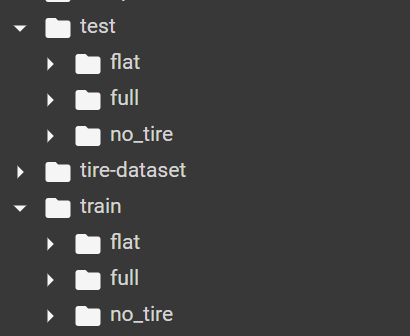

In [128]:
!ls

Ronaldo      sample_data  Son.zip  tire-dataset  train
Ronaldo.zip  Son	  test	   tire.zip


In [129]:
!pwd

/content


데이터 파일 구조와 y_class에 따라 customizing하여 아래 클래스를 바탕으로 수정하여 사용하시면 됩니다.
* 그러니까 아래 있는 거는 한가지 예시라고만 보시면 될 것 같아요.
* 변수명이나 경로 그리고 jpg,jpeg,png 등 자신의 환경에 따라 고쳐야할게 많습니다 ㅎㅎ


In [131]:
import glob
import random
import torch
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, DataLoader


class mycustom_DataSet(Dataset):
    def __init__(self, path, train=True, transform=None, n=-1):
        self.path = path

        # train
        if train:
            self.flat_path = path + '/train/flat'
            self.full_path = path + '/train/full'
            self.no_tire_path = path + '/train/no_tire'

        # test
        else:
            self.flat_path = path + '/test/flat'
            self.full_path = path + '/test/full'
            self.no_tire_path = path + '/test/no_tire'
        
        # 해당 경로의 이름을 갖는 파일들을 모두 리스트안에 저장
        self.flat_img_list = glob.glob(self.flat_path + '/*.jpg')
        self.full_img_list = glob.glob(self.full_path + '/*.jpg')
        self.no_tire_img_list = glob.glob(self.no_tire_path + '/*.jpg')

        # 대용량 데이터라고 가정하고 파일별로 n개의 이미지만 선택해보자.
        if n==-1: # 입력하지 않으면, 모든 데이터를 사용한다.
            self.n = (len(self.flat_img_list) + len(self.full_img_list) + len(self.no_tire_img_list))/3
        else: # 입력하면, 입력된 n개만큼의 데이터를 사용한다.
            self.n = n
        idx = random.sample(range(0,len(self.flat_img_list)),self.n)
        self.flat_img_list = list(np.sort(np.array(self.flat_img_list)[idx]))
        idx = random.sample(range(0,len(self.full_img_list)),self.n)
        self.full_img_list = list(np.sort(np.array(self.full_img_list)[idx]))
        idx = random.sample(range(0,len(self.no_tire_img_list)),self.n)
        self.no_tire_img_list = list(np.sort(np.array(self.no_tire_img_list)[idx]))

        # 해당되는 모든 경로들을 갖는 파일의 경로를 저장
        self.img_list = self.flat_img_list + self.full_img_list + self.no_tire_img_list

        # 해당 객체를 선언할시에, 데이터를 미리 다 올려놓는다.
        # 따라서 처음 객체 선언시에는 시간이 조금 걸리지만
        # 한 번 선언한 후에는 시간이 적게 걸린다.
        self.Image_list = []
        for img_path in self.img_list:
            self.Image_list.append(Image.open(img_path))

        # flat/full/no_tire -> 0/1/2 labeling
        self.class_list = [0] * len(self.flat_img_list) + [1] * len(self.full_img_list) + [2] * len(self.no_tire_img_list)
    
        # transform을 transform이라는 변수에 저장
        self.transform = transform



    def __len__(self):
        return len(self.img_list)



    def __getitem__(self, idx):
        img_path = self.img_list[idx]
        label = self.class_list[idx]
        img = Image.open(img_path)

        if self.transform is not None:
            img = self.transform(img)

        return img, label

In [132]:
# 이전에 만든 transform

my_transform = transforms.Compose([
    transforms.Resize(224),                 
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(20),
    
    transforms.ToTensor(),
    transforms.Normalize(mean_, std_)

])

In [133]:
path = '/content'

train_data = mycustom_DataSet(path=path, train=True, transform=my_transform, n=100)

len(train_data) # 데이터수가 100*3 = 300개이다.

300

In [134]:
test_data = mycustom_DataSet(path=path, train=False, transform=my_transform, n=20)
len(test_data) # 데이터수가 20*3 = 60개이다.

60

참고적으로 DataLoader의 경우에도 일부 custom하는 방법이 있다. 물론 DataSet처럼 class자체를 만드는 것은 아니지만, DataLoader의 인자인 collate_fn에 함수를 넣어줄 수 있다.
* 왜 사용하는가 ?
    * batch로 묶이게 될 모든 데이터들을 길이에 상관없이 하나로 잘 묶어주기 위해 collate_fn 인자에 함수를 넣어준다.
    * 참고자료 : https://ga02-ailab.tistory.com/27

### 그럼 이 다음에는 어떻게 계속 진행되는가..?
* DataLoader( )로 위에서 만든 Dataset을 올려주면 된다.
* 즉, DataLoader()로 이제 batch 만큼 나눠주면 된다는 의미
* 아래 그림에서 Dataset 과정이 끝났기에, 이제는 DataLoader 과정을 진행해야하는 상태

Recall

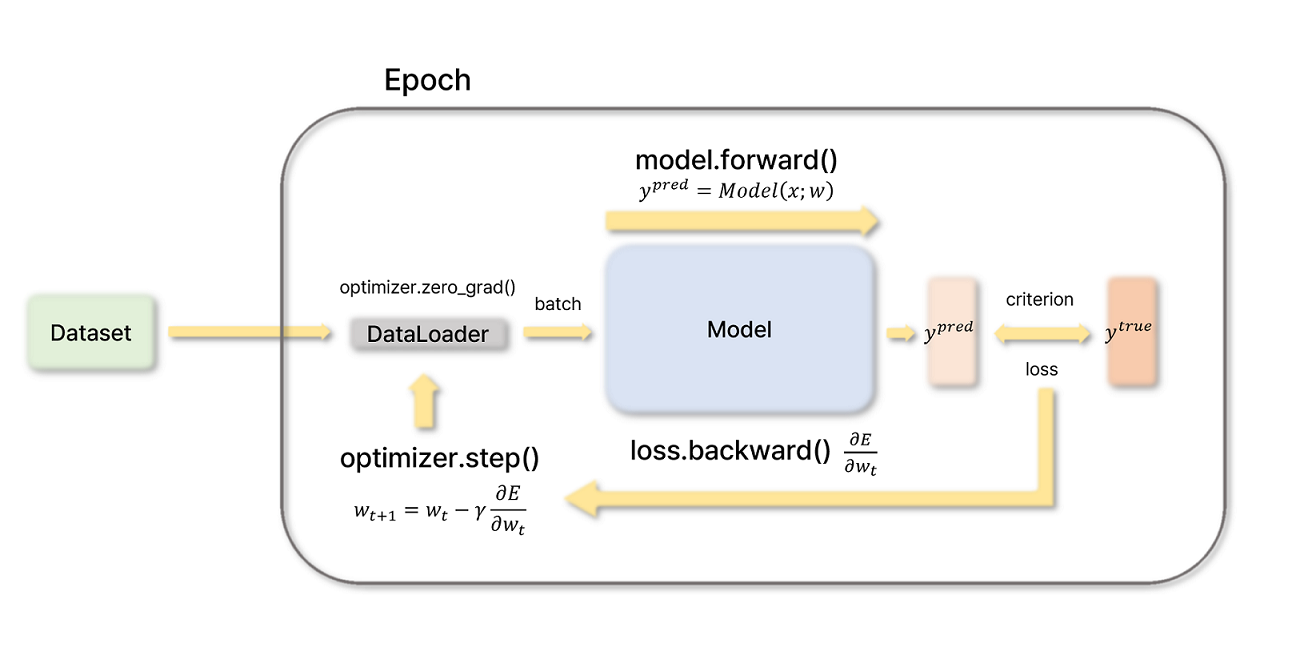

In [135]:
trainloader_mycustom_Data_tire = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      
    shuffle=True,         
    num_workers=2
)

testloader_mycustom_Data_tire = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      
    shuffle=False,        
    num_workers=2
)

이후, 아래 과정을 진행한다.
> 모델 객체 선언 및 모델변수 생성 -> 손실함수 및 옵티마이저 정의 -> 모델 학습 -> 모델 테스트

# 전이학습 / Transfer Learning / 사전훈련

> - `torchvision`의 `models`를 활용하여 전이학습
> - https://pytorch.org/docs/stable/torchvision/models.html
> - 코드 출처: https://tutorials.pytorch.kr/beginner/transfer_learning_tutorial.html

## modules import

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler # learning-rate scheduler
from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import time
import os
import copy

## GPU 설정

In [137]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [138]:
device

device(type='cuda')

## 데이터 로드 및 확인

In [ ]:
# pytorch 홈페이지에서 데이터 다운로드

!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip # hymenoptera_data.zip 다운로드
!unzip hymenoptera_data -d . # 해당 zip 파일 압축 해제

In [140]:
# 현재 경로상에 있는 파일들 확인

!ls # hymenoptera_data 폴더가 있는지 확인

hymenoptera_data      Ronaldo	   sample_data	Son.zip  tire-dataset  train
hymenoptera_data.zip  Ronaldo.zip  Son		test	 tire.zip


In [141]:
%cd hymenoptera_data
!ls

/content/hymenoptera_data
train  val


In [142]:
%cd ..

/content


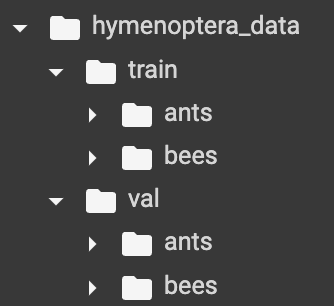

다운로드 받은 데이터의 구조가 train/val -> ants/bees 로 이미 되어 있기에, 따로 파일구조를 바꿀 필요는 없다.
* 이 상태로 ImageFolder( )를 사용하여, datasets을 만들어주면 된다.

## 전처리 설정

In [143]:
# train / val 에 대한 transform(전처리)를 각각 정의한 딕셔너리 만들기

data_transforms = {'train': transforms.Compose( [transforms.RandomResizedCrop(224), # 224로 바꿔준다.
                                                 transforms.RandomHorizontalFlip(),
                                                 transforms.ToTensor(),
                                                 transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])] ), # rgb임으로 3개씩; 대중적으로 널리 알려진 값
                   'val': transforms.Compose( [transforms.Resize(256),
                                               transforms.CenterCrop(224), # 최종적으로 train과 같이 224로 바꿔준다.
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])] ) # 위와 동일
                   }

In [144]:
data_dir = '/content/hymenoptera_data'

# ImageFolder( ) 로 datasets 정의
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                    for x in ['train', 'val']}

# DataLoader( ) 로 batch-size 만큼 데이터를 쪼갠 그룹 만들기
dataloaders = {x: DataLoader(image_datasets[x],
                             batch_size=4,
                             shuffle=True,
                             num_workers=4) for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train','val']}
class_names = image_datasets['train'].classes

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [145]:
dataset_sizes

{'train': 244, 'val': 153}

In [146]:
class_names

['ants', 'bees']

## 사전훈련된 모델 로드

In [147]:
model_ft = models.resnet18(pretrained=True) # torchvision 라이브러리로부터 이미 학습된 모델인 'resnet18'을 가져온다.
model_ft

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

- ImageNet 의 데이터를 훈련한 모델
  - `num_class`가 1000
  - 가장 마지막의 layer이자 유일한 fc-layer의 output node 값이 1,000개로 1,000개의 class로 분류가 되는 모델이다.
  - 즉, model class의 __init__()부분에는 self.fc = nn.Linear(512, 1000)로 fc변수가 정의되어 있을 것이다.
  - 따라서 우리의 분류문제는 2개의 class인 ants/bees 임으로, 해당 변수를 nn.Linear(512, 2) 로 변경해주자.

- 데이터의 클래스 수에 맞게 `out_features` 변경

In [148]:
# model class의 fc 변수값

model_ft.fc

Linear(in_features=512, out_features=1000, bias=True)

In [149]:
print(model_ft.fc.in_features, model_ft.fc.out_features)

512 1000


In [150]:
# model class의 fc 변수 중 out_features를 변경

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2) # 2 = ants / bees

# gpu위에 올린다.
model_ft = model_ft.to(device)

## 손실함수와 옵티마이저

In [151]:
criterion = nn.CrossEntropyLoss() # 분류 -> 다중 cross-entropy

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

-  7 에폭마다 0.1씩 학습율 감소

In [152]:
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
exp_lr_scheduler

## 모델 학습(1)
> 기존 학습된 모델의 구조를 가져와 일부 구조만 변경한 뒤, 모든 weights를 재학습시킨다.

이전에 모델 전체 학습시 사용한 방법

In [ ]:
# for epoch in range(10):

#     running_loss = 0.0 # CrossEntropyLoss값 1개; scaler

#     for i, data in enumerate(train_loader, start=0): # i = 0 ~ 468개의 batch, 각 batch에 들어있는 data크기 = 128x1x28x28
#         inputs, labels = data

#         optimizer.zero_grad() # epoch마다 gradient 0으로 초기화

#         outputs = net(inputs) # y_pred = f(X)
#         loss = criterion(outputs, labels) # CrossEntropyLoss; 0~1 사이값
#         loss.backward() # back-propagation; gradient 계산
#         optimizer.step() # parameters(weights) update

#         running_loss += loss.item() # 그냥 전체적인 비교를 위해 누적함

#         if i % 100 == 99: # 100번 마다 확인; epoch=10, iter(=i)=469, batch=128
#             print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000)) # 
#             running_loss = 0.0

- 학습 함수 정의

### 함수 내부 뜯어보기

#### copy.deepcopy(model.state_dict())
* 참고자료 : https://crackerjacks.tistory.com/14

In [ ]:
# model_ft 의 가중치들이 저장되어 있다.

model_ft.state_dict()

In [154]:
type(model_ft.state_dict())

collections.OrderedDict

In [ ]:
model_ft.state_dict().keys()

deepcopy() : 주소도 다르게 해서 복사를 진행한다.
* 이렇게 하면 복사한 값이 변경되어도, 기존 값의 변화는 없다.

정수형의 경우, b=a 를 해도 그냥 깊은 복사가 된다.

In [156]:
a = 1
b = a
b = 2
a

1

In [157]:
a = 1
b = copy.deepcopy(a)
b = 2
a

1

리스트와 딕셔너리의 경우, b=a 를 하면 주소를 공유해버리기에 deepcopy() 로 주소를 다르게 해준다.

In [158]:
a = {'x':1, 'y':2}
b = a
b['x']=3
a

{'x': 3, 'y': 2}

In [159]:
a = {'x':1, 'y':2}
b = copy.deepcopy(a)
b['x']=3
a

{'x': 1, 'y': 2}

#### model.train() vs model.eval()
* 참고자료 : https://bluehorn07.github.io/2021/02/27/model-eval-and-train.html

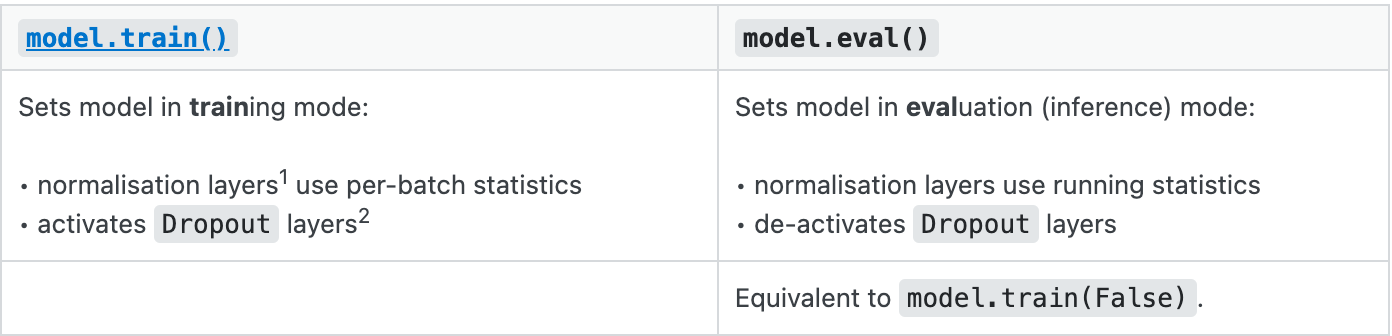

#### for inputs, labels in dataloaders[phase]:

In [ ]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f279c3e5b80>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f279c585cd0>}

In [ ]:
dataloaders['train']

In [ ]:
for inputs, labels in dataloaders['train']:
    print(inputs.shape, '\n')
    print(labels.shape)

    break;

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([4, 3, 224, 224]) 

torch.Size([4])


#### with torch.set_grad_enabled(phase == 'train'):

In [160]:
x = torch.tensor([1], requires_grad=True, dtype=float)
print(x.requires_grad)
y = x * 2
print(y.requires_grad, '\n')

is_train = False
with torch.set_grad_enabled(is_train): # 여기 안으로 들어와서 어떤 변수를 정의하면, requires_grad=is_train으로 지정된다.
    print(x.requires_grad)
    print(y.requires_grad)
    z = y + 2
    print(z.requires_grad, '\n')

print(x.requires_grad)
print(y.requires_grad)
print(z.requires_grad)

True
True 

True
True
False 

True
True
False


In [ ]:
torch.set_grad_enabled(True)
y = x * 2
print(y.requires_grad)

torch.set_grad_enabled(False)
y = x * 2
print(y.requires_grad)

True
False


### model의 train & validation 동시 구현

In [161]:
def train_model(dataloaders, model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time() # 시작시점 기록

    # 모델의 weight(가중치)를 깊은 복사하여, 이 변수가 변해도 해당 모델의 weight가 변하지 않도록 한다.
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs): # epochs만큼 반복
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train','val']: # train -> validation 순차 진행
            if phase == 'train':
                model.train() # train일 때는, layer의 batch-normal과 drop-out 등 을 활성화시킨다.
            else:
                model.eval() # validation(=evaluation) 때는, layer의 batch-normal과 drop-out 등 을 비활성화시킨다.
                # 즉, 이전에 train에서 정해진 값들로 정해지고, update는 없다.

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]: # batch마다
                inputs = inputs.to(device) # gpu위에 올린다; [4, 3, 224, 224]
                labels = labels.to(device) # gpu위에 올린다; [4]

                optimizer.zero_grad() # batch마다 gradient 0으로 초기화

                with torch.set_grad_enabled(phase == 'train'): # train일 때, True로 새로 정의된 변수들의 연산들이 추적되어 gradient가 계산된다.
                    outputs = model(inputs) # 실수값
                    _, preds = torch.max(outputs, 1) # 가장 큰 값을 선택; 분류
                    loss = criterion(outputs, labels) # loss-function

                    if phase == 'train':
                        loss.backward() # back-propagation; gradient 계산
                        optimizer.step() # parameters(weights) update
                
                running_loss += loss.item() * inputs.size(0) # inputs.size(0) = batch-size; 4
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f}\tAccuracy: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # validation의 목적; 이전에 train 시킨 후에, 정해진 각 epochs마다 모델 성능을 비교하여, 가능 좋은 값을 찾아낸다.
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        
        print()

    time_elapsed = time.time() - since
    print('Training time: {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

    model.load_state_dict(best_model_wts) # 가장 좋은 성능을 보인 가중치로 바꿔주기
    return model


In [162]:
# 모델 train & validation

model_ft = train_model(dataloaders, model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/9
----------
train Loss: 0.5820	Accuracy: 0.6762
val Loss: 0.2349	Accuracy: 0.8954

Epoch 1/9
----------
train Loss: 0.4235	Accuracy: 0.8156
val Loss: 0.2484	Accuracy: 0.8954

Epoch 2/9
----------
train Loss: 0.4194	Accuracy: 0.8238
val Loss: 0.2513	Accuracy: 0.9216

Epoch 3/9
----------
train Loss: 0.4617	Accuracy: 0.8033
val Loss: 0.2705	Accuracy: 0.9020

Epoch 4/9
----------
train Loss: 0.4610	Accuracy: 0.7869
val Loss: 0.2509	Accuracy: 0.9281

Epoch 5/9
----------
train Loss: 0.4500	Accuracy: 0.8156
val Loss: 0.3712	Accuracy: 0.8627

Epoch 6/9
----------
train Loss: 0.6499	Accuracy: 0.7541
val Loss: 0.3414	Accuracy: 0.8693

Epoch 7/9
----------
train Loss: 0.3402	Accuracy: 0.8607
val Loss: 0.2764	Accuracy: 0.9150

Epoch 8/9
----------
train Loss: 0.3420	Accuracy: 0.8525
val Loss: 0.2640	Accuracy: 0.9085

Epoch 9/9
----------
train Loss: 0.2317	Accuracy: 0.9098
val Loss: 0.2925	Accuracy: 0.8889

Training time: 0m 51s
Best Validation Accuracy: 0.9281


### 가중치 변화 확인하기

이미 위에서 학습이 진행되었음으로, 다시 model을 선언하는 부분을 실행시킨 뒤에 이 부분을 실행시켜줘야 큰 변화의 확인이 가능하다.

In [163]:
# model 및 다른 기타 것들을 다시 정의

model_ft = models.resnet18(pretrained=True)

num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft

In [166]:
# 첫번째 filter의 가중치값들 크기

list(model_ft.parameters())[0].shape

torch.Size([64, 3, 7, 7])

In [168]:
# 워낙 크기에 다음과 같이 각 weight의 절댓값들을 더한 합을 관찰해보자.
# 1번째 filter의 가중치절댓값의 합

list(model_ft.parameters())[0].abs().sum()

tensor(716.4541, device='cuda:0', grad_fn=<SumBackward0>)

In [169]:
# 마지막인 filter의 가중치절댓값의 합
# 우리가 변경해준 layer와 관련된 가중치이다.
# (fc): Linear(in_features=512, out_features=2, bias=True)

list(model_ft.parameters())[-2].shape

torch.Size([2, 512])

In [170]:
def train_model(dataloaders, model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time() 

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs): 
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train','val']: 
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f}\tAccuracy: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            # 추가된 부분; weight 추적
            #################################################################################
            print('first-weight', list(model.parameters())[0].abs().sum().item())
            print('last-weight', list(model.parameters())[-2].abs().sum().item(), '\n')
            #################################################################################

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        
        print()

    time_elapsed = time.time() - since
    print('Training time: {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Validation Accuracy: {:.4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [171]:
# 모델 train & validation

model_ft = train_model(dataloaders, model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6202	Accuracy: 0.6721
first-weight 716.4075927734375
last-weight 24.3306884765625 

val Loss: 0.2826	Accuracy: 0.8889
first-weight 716.4075927734375
last-weight 24.3306884765625 


Epoch 1/9
----------
train Loss: 0.5737	Accuracy: 0.7869
first-weight 716.7401123046875
last-weight 27.164737701416016 

val Loss: 0.2919	Accuracy: 0.9020
first-weight 716.7401123046875
last-weight 27.164737701416016 


Epoch 2/9
----------
train Loss: 0.5316	Accuracy: 0.8074
first-weight 717.1280517578125
last-weight 26.44244956970215 

val Loss: 0.5055	Accuracy: 0.8170
first-weight 717.1280517578125
last-weight 26.44244956970215 


Epoch 3/9
----------
train Loss: 0.6250	Accuracy: 0.7787
first-weight 717.8167724609375
last-weight 26.606698989868164 

val Loss: 0.5756	Accuracy: 0.8105
first-weight 717.8167724609375
last-weight 26.606698989868164 


Epoch 4/9
----------
train Loss: 0.5893	Accuracy: 0.7664
first-weight 718.2470703125
last-weight 25.841176986694336 

val Loss

Epoch 0/9

train
> * first-weight 717.0440673828125
> * last-weight 24.16781234741211 

validation
> * first-weight 717.0440673828125
> * last-weight 24.16781234741211 

Epoch 9/9

train
> * first-weight 717.46728515625
> * last-weight 25.35677146911621 

validation
> * first-weight 717.46728515625
> * last-weight 25.35677146911621 

확인결과
* phase = 'train'의 경우, 처음과 마지막 가중치의 변경이 진행된다.
* phase = 'val'의 경우, 처음과 마지막 가중치의 변경이 없다.
> 즉, train은 가중치의 변경이 일어나고, validation은 가중치의 변경이 일어나지 않는다.
> 또한, 이번에 진행한 transfer-learning의 경우에는 마지막 layer를 변경하고 이전 layer의 구조는 동일하게 유지한 상태로, 전체 가중치를 학습하였다.


## 결과 시각화

- 시각화 함수 정의

In [172]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [173]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        
        model.train(mode=was_training)

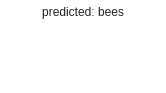

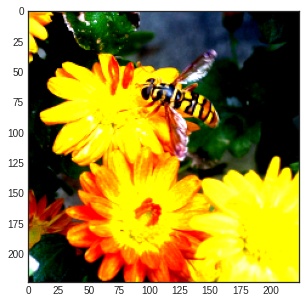

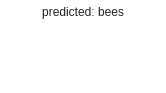

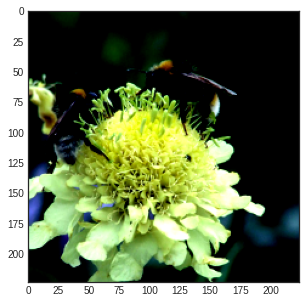

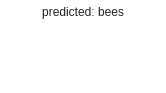

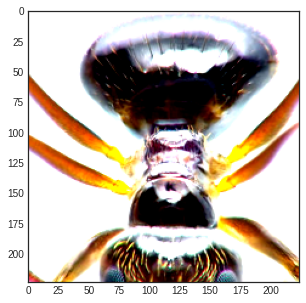

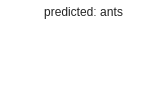

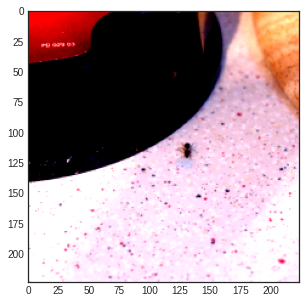

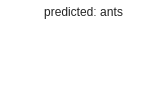

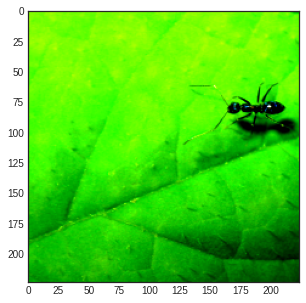

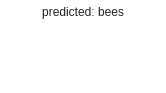

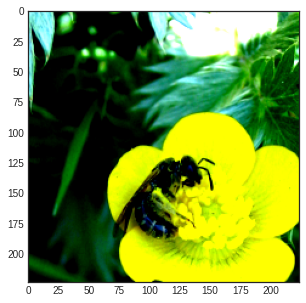

In [174]:
visualize_model(model_ft)

## 모델 학습(2)
> 고정된 특징 추출기로써의 합성곱 신경망
> 구조 변경은 하였지만, 변경한 구조를 제외한 나머지 weights들은 고정시킨다.
* 마지막 계층을 제외한 신경망의 모든 부분을 고정
*  `requires_grad == False` 로 설정하여 매개변수를 고정하여 backward() 중에 경사도가 계산되지 않도록 한다.



In [175]:
# (복습) requires_grad = False의 의미

x = torch.ones(3,3, requires_grad=True)
print(x, '\n')

x.requires_grad = False
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [176]:
model_conv = torchvision.models.resnet18(pretrained=True)

######################################################
for param in model_conv.parameters():
    param.requires_grad = False # gradient 계산 추적을 하지 않도록 한다.
######################################################

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2) # 마지막 layer를 내 상황에 맞게 변경

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [177]:
model_conv = train_model(dataloaders, model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.7804	Accuracy: 0.6189
first-weight 716.4541015625
last-weight 25.754806518554688 

val Loss: 0.4624	Accuracy: 0.7843
first-weight 716.4541015625
last-weight 25.754806518554688 


Epoch 1/9
----------
train Loss: 0.4937	Accuracy: 0.7664
first-weight 716.4541015625
last-weight 26.950763702392578 

val Loss: 0.3605	Accuracy: 0.8366
first-weight 716.4541015625
last-weight 26.950763702392578 


Epoch 2/9
----------
train Loss: 0.3807	Accuracy: 0.8320
first-weight 716.4541015625
last-weight 28.513919830322266 

val Loss: 0.2085	Accuracy: 0.9150
first-weight 716.4541015625
last-weight 28.513919830322266 


Epoch 3/9
----------
train Loss: 0.4077	Accuracy: 0.8320
first-weight 716.4541015625
last-weight 29.72534942626953 

val Loss: 0.1586	Accuracy: 0.9477
first-weight 716.4541015625
last-weight 29.72534942626953 


Epoch 4/9
----------
train Loss: 0.4763	Accuracy: 0.7910
first-weight 716.4541015625
last-weight 30.54079246520996 

val Loss: 0.1638	Accuracy: 0.

Epoch 0/9

train
> * first-weight 716.4541015625
> * last-weight 25.409881591796875 

validation
> * first-weight 716.4541015625
> * last-weight 25.409881591796875 

Epoch 9/9

train
> * first-weight 716.4541015625
> * last-weight 32.09064865112305 

validation
> * first-weight 716.4541015625
> * last-weight 32.09064865112305 

확인결과, 마지막 layer에 대한 weights는 train시점에 가중치가 update되었다. 그러나 처음 layer에 대한 weights는 그러지 못했다.
* 참고로 validation은 가중치 업데이트가 일어나지 않고, train과 동일하다. (이전 사전학습모델의 학습 때와 동일)

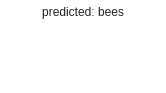

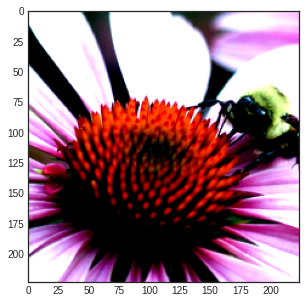

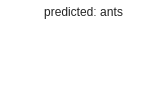

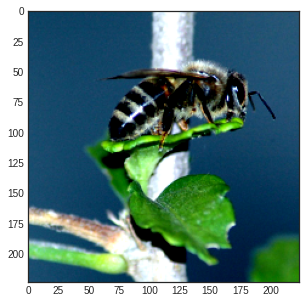

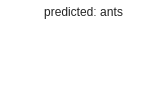

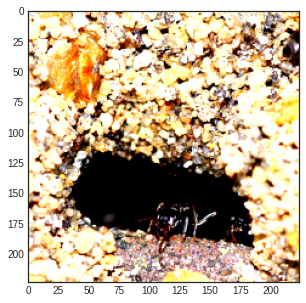

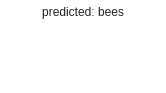

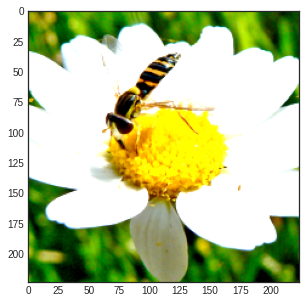

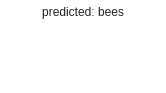

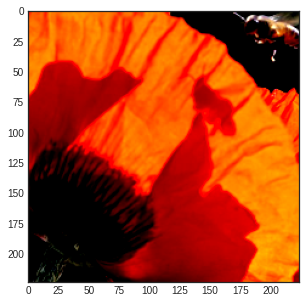

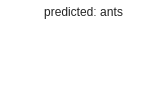

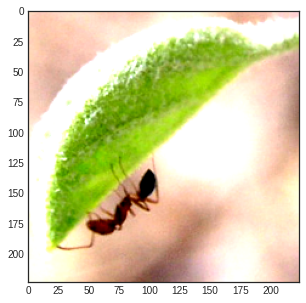

In [178]:
visualize_model(model_conv)

# 추후 Batch-Normal / Drop-out / Weight Initialization 등은 추가자료로 제공